In [3]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [4]:
secretnumber = '0100'
n =  len(secretnumber)

In [5]:
circuit = QuantumCircuit(n+1, n)

circuit.h(range(n))
circuit.x(n)
circuit.h(n)
circuit.barrier()

for i,yesno in enumerate(reversed(secretnumber)):
    if (yesno == '1'):
        circuit.cx(i,n)

circuit.barrier()
circuit.h(range(n))
circuit.measure(range(n),range(n))

In [6]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'0100': 1}


In [8]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmqx2')
job = execute(circuit, backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

ibmqfactory.load_account:WARNING:2021-07-18 19:18:38,996: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


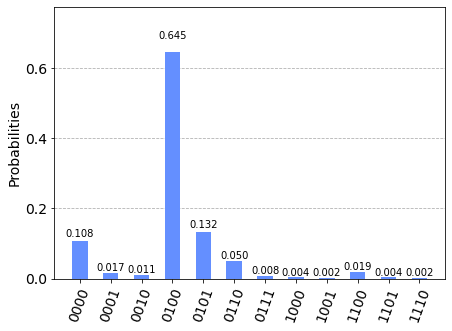

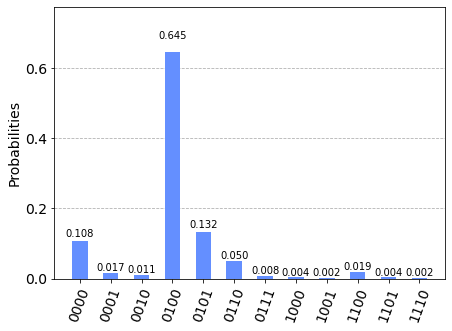

In [9]:
from qiskit.tools.visualization import plot_histogram
result = job.result()
plot_histogram(result.get_counts(circuit))

In [2]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)
cal_circuits, state_labels = complete_meas_cal(qr = circuit.qregs[0], circlabel = 'measerrormitigationcal' )

cal_job = execute(cal_circuits,
    backend = qcomp,
    shots = 1024,
    optimization_level= 0
    )
print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()

AttributeError: module 'qiskit.circuit' has no attribute 'qregs'